In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import matplotlib. pyplot as plt
from nltk import FreqDist
import plotly.express as px
from collections import Counter
from nltk.text import Text 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download('vader_lexicon')

In [2]:
df = pd.read_pickle('data/raw_data.pkl')

In [3]:
df.tail(3)

,URL,file_contents,Company,Year,Quarter
51,https://s2.q4cdn.com/278413729/files/doc_finan...,...,Hyatt,2019,3
52,https://s2.q4cdn.com/278413729/files/doc_finan...,...,Hyatt,2019,2
53,https://s2.q4cdn.com/278413729/files/doc_finan...,...,Hyatt,2019,1


#### Define StopWords

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
extended_stop_words=['obviously',"that's",
 'probably','bit','second','company',"'ll",'&',"'re",'––','--','years','got','–',"'s",'much',"n't",'many',"'ve",'get','may','today','room','rooms','around','kind','seen','continue','seeing','given',"we're",'still','look','like','sure','really','could',"we've",'levels','back','see','business','hotel','hotels','million','first','think','year','quarter','percent','group','.','i',':','and','we','‐‐','so','also','but','$',';','thi','-',',','‐','?','’','us']
for i in extended_stop_words:
    stop_words.add(i)

### 1. Frequency Distribution

In [6]:
@interact(Year=list(set(df['Year'].sort_values(ascending=False))),Quarter=list(set(df['Quarter'])),
          Company=list(set(df['Company'])),Top__Words=[10,25,30,50])
def h(Company,Year,Quarter,Top__Words):
    transcript = df[(df['Year'] == Year) & (df['Quarter'] == Quarter)& (df['Company'] == Company)]['file_contents'].to_list()[0]
    word_tokens = word_tokenize(transcript)
    ps = PorterStemmer()

    stemed_transcript = []
    for w in word_tokens:
        #stemed_transcript.append(ps.stem(w).lower())
        stemed_transcript.append(w.lower())

    filtered_transcript = []
    for w in stemed_transcript:
        if w not in stop_words:
            filtered_transcript.append(w)
    
    fdist = FreqDist(filtered_transcript)
    fd = fdist.most_common(Top__Words)
    
    x_val = [x[0] for x in fd]
    y_val = [x[1] for x in fd]

    fig = px.bar(x=x_val, y=y_val, labels =x_val)
    fig.update_layout(
        title="Top "+str(Top__Words)+" Frequently Mentioned Words - "+Company+" "+str(Year)+" Q"+str(Quarter)+" ",
        xaxis_title="Frequently mentioned words",
        yaxis_title="How many times a word has been mentioned",
        legend_title="Top Words",
        font=dict(
    #         family="Courier New, monospace",
            size=12,
            color="Black"
        )
    )
    fig.update_xaxes(tickangle=45, tickfont=dict(family="Courier New, monospace", size=14))

    fig.show()

interactive(children=(Dropdown(description='Company', options=('Hyatt', 'Marriott'), value='Hyatt'), Dropdown(…

### 2. Certain Word/Word Groups Count

In [7]:
@interact(Year=list(set(df['Year'].sort_values(ascending=False))),
          Quarter=list(set(df['Quarter'])),
          Company=list(set(df['Company'])),
          Key_Words="Recovery")
def g(Year,Quarter,Company,Key_Words):
    transcript = df[(df['Year'] == Year) & (df['Quarter'] == Quarter)& (df['Company'] == Company)]['file_contents'].to_list()[0]
    word_tokens = word_tokenize(transcript)
    textListNLTK = Text(word_tokens) 
    textListNLTK.concordance(Key_Words,lines=25)

interactive(children=(Dropdown(description='Year', options=(2016, 2017, 2018, 2019, 2020, 2021, 2010, 2011, 20…

### 3 The Word Trends

In [10]:
@interact(Company=widgets.SelectMultiple(options=list(set(df['Company']))),Key_Words="Recovery")
def h(Company,Key_Words):
    counts= []
    chart_df =pd.DataFrame()
    for i in range(len(df)) :
        TEMP = df[(df['Company'] == df.iloc[i, 2])&(df['Year'] == df.iloc[i, 3])&(df['Quarter'] == df.iloc[i, 4])]
        chart_df = chart_df.append(TEMP)
        try:
            transcript = df[(df['Company'] == df.iloc[i, 2])&(df['Year'] == df.iloc[i, 3])&(df['Quarter'] == df.iloc[i, 4])]['file_contents'].to_list()[0]
            word_tokens = word_tokenize(transcript)
            wordcounts_lower = Counter(i.lower() for i in word_tokens)
            count = Counter(wordcounts_lower)
            key_word_count = count[Key_Words.lower()]
            counts.append(key_word_count)
        except: 
            None
    chart_df['word_counts'] = counts
    chart_df_year=chart_df.groupby(by=["Company","Year"]).sum().reset_index()
    chart_df_year=chart_df_year[chart_df_year['Company'].isin(Company)]
    fig = px.line(chart_df_year, x='Year', y="word_counts", color = "Company")

    fig.update_layout(
        title= "How many times the word "+"'"+ str(Key_Words)+"'"+ " has been mentioned",
        xaxis_title="Year",
        yaxis_title="Frequency",
    #         legend_title="Top Words",
        font=dict(
    #         family="Courier New, monospace",
            size=12,
            color="Black"
        )
    )
    fig.update_xaxes(tickangle=45, tickfont=dict(family="Courier New, monospace", size=14))

    fig.show()

interactive(children=(SelectMultiple(description='Company', options=('Hyatt', 'Marriott'), value=()), Text(val…

### 4 The sentiment

In [11]:
word = 'recovery'

In [12]:
transcript = df[(df['Year'] == 2020) & (df['Quarter'] == 2)& (df['Company'] == "Marriott")]['file_contents'].to_list()[0]
word_tokens = word_tokenize(transcript)
textListNLTK = Text(word_tokens)

In [13]:
sia = SentimentIntensityAnalyzer()

In [17]:
scores= []
for i in range(0,30):
    try:
        sentence1 = ' '.join(word for word in textListNLTK.concordance_list(word,width=50)[i][0])
        sentence2 = ' '.join(word for word in textListNLTK.concordance_list(word,width=50)[i][2])
        sentence = sentence1+" "+word+" "+sentence2
        score =sia.polarity_scores(sentence)['compound']
        print("Sentence: "+sentence)
        print("Sentiment score: "+str(score))
        scores.append(score)
        print("------------------------------------")
    except:
        print("completed")
        break

Sentence: , over 90 percent of which are managed , is leading the recovery and has seen rapid improvements in occupancy and new bookings .
Sentiment score: 0.3182
------------------------------------
Sentence: of pre‐COVID levels . While leisure and drive‐to destinations led the initial recovery , it is encouraging to see business transient as well as
Sentiment score: 0.6705
------------------------------------
Sentence: percentage points of improvement per month . At the current rate of recovery , and assuming no wide resurgence of COVID‐19 , the Greater
Sentiment score: 0.5106
------------------------------------
Sentence: phases of reopening and as certain borders remain closed . But the recovery of travel in Greater China demonstrates the resiliency of demand once
Sentiment score: 0.4767
------------------------------------
Sentence: of our hotels are now open . We are experiencing a steady recovery across all chain scales , although the rate of recovery within
Sentiment score: 0.0

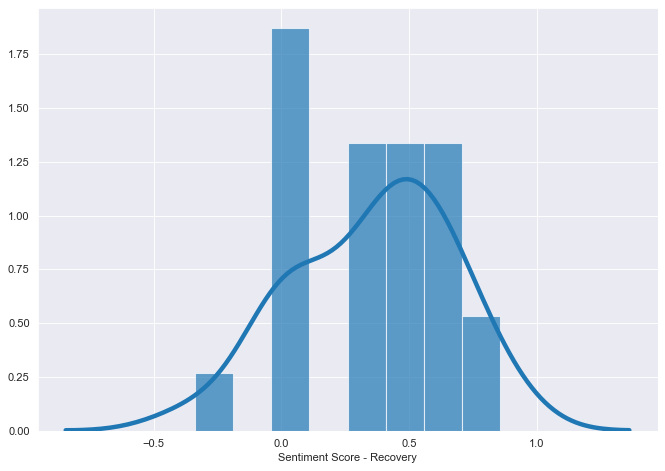

In [19]:
import seaborn as sns
sns.set_style("darkgrid")
kwargs = dict(hist_kws={'alpha':0.7}, kde_kws={'linewidth':4})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(scores, label="Compact",bins=8, **kwargs,axlabel='Sentiment Score - Recovery');